### Step 1: Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Step 2. Reading and Understanding Dataset

In [2]:
boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
##checking for shape of dataframe
boom_bikes.shape

(730, 16)

In [4]:
## checking for more stastitical information
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
## checking for null values and data types of columns
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### There are not any null values and data types of all columns seems to be okay. But there are some columns which are categorical but expressed in numbers like 'season'. This needs to be changed. 
##### Analyzing it more clearly in Data Cleaning.

### Step 3: Data Cleaning

In [6]:
## Dropping unnecessary columns
### 1. Dropping 'instant' column as it is index column which has nothing to do with our target variable, 'cnt'
boom_bikes.drop(['instant'], axis = 1, inplace = True)

### 2. Dropping 'dteday' as necessary information is already filled in 'yr' and 'month' columns
boom_bikes.drop(['dteday'], axis = 1, inplace = True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
## dropping 'casual' and 'registered' columns as we have total count of casual and registered customers in 'cnt'.
boom_bikes.drop(['casual','registered'], axis = 1, inplace = True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
### checking for duplicates and dropping them if any
boom_bikes.drop_duplicates(subset = None, inplace = True)
boom_bikes.shape

(730, 12)

##### Since the shape of dataframe before dropping duplicates and after is same. Hence the datafram has not any duplicates.

#### 3.1 Handling Missing Values

In [9]:
### have checked eariler that there are no missing values but lets verify it again.
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


#### There are no Missing Values

#### 3.2 Checking for Outliers

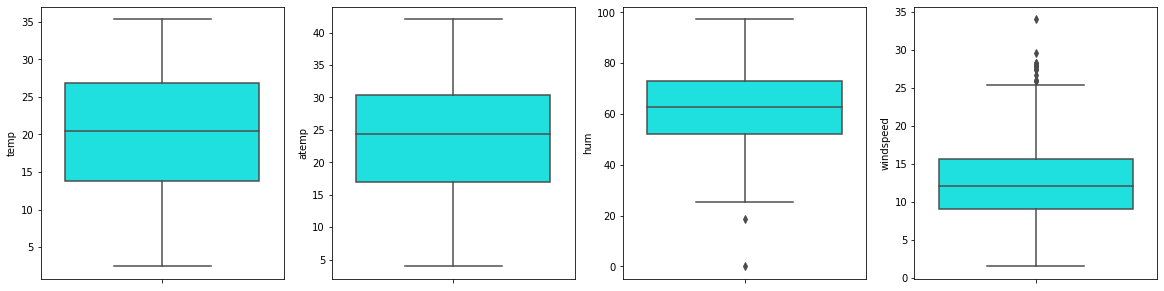

In [10]:
## checking outliers for continuous variables by plotting boxplot
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (20,5))
count = 1
for i in col:
    plt.subplot(1,4, count)
    sns.boxplot(y = i, data = boom_bikes, color = 'cyan')
    count = count + 1

##### we can see that there are no ouliers for above continuous variables hence no need of handling.

In [11]:
### checking for unique values in all columns
boom_bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### 3.3 Categorical columns handling

##### we can see that variables 'season' ,'mnth', 'weekday', weathersit' are actaully categorical but mentioned in numberic sense. Hence creating dummy variables is necessary. But before creating, the datatpe needs to be converted into category or object.

In [12]:
### converting into 'category' data type
boom_bikes['season'] = boom_bikes['season'].astype('category')
boom_bikes['mnth'] = boom_bikes['mnth'].astype('category')
boom_bikes['weekday'] = boom_bikes['weekday'].astype('category')
boom_bikes['weathersit'] = boom_bikes['weathersit'].astype('category')
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


In [13]:
### 1. Encoding the 'season' column
boom_bikes['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
### 2. Encoding the 'weathersit' column
boom_bikes['weathersit'].replace({1:"Clear",2:"Mist",3:"Light rain",4:'Heavy Rain'},inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
### 3. Encoding the 'weekday' column
boom_bikes['weekday'].replace({0:"Sun",1:"Mon",2:"Tues",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"},inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
### 4. Encoding the 'mnth' column
boom_bikes['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 
                            7:'july', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'},inplace=True)
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 4: Data Visualization

<Figure size 1080x360 with 0 Axes>

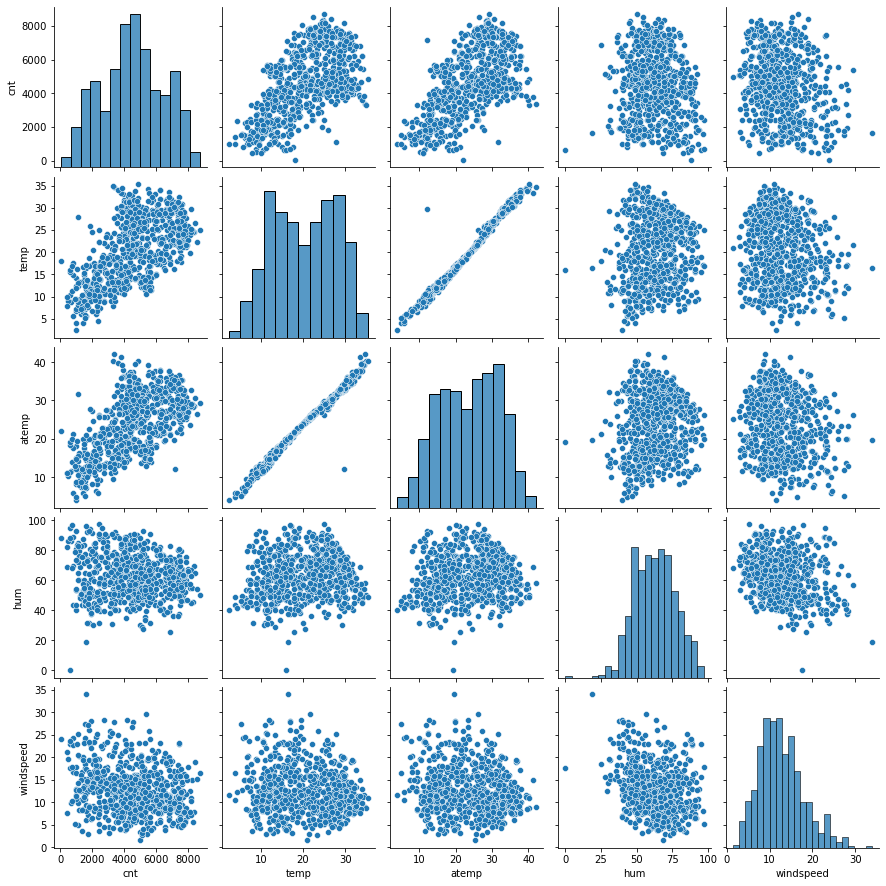

In [17]:
## visualizing numeric variables using pairplots
plt.figure(figsize = (15,5))
sns.pairplot(data = boom_bikes, vars = ['cnt', 'temp','atemp', 'hum', 'windspeed'])
plt.show()

##### from above graph we can see that our target variable 'cnt' has preety good linear relationship with other numeric variables. 
##### Also from graph, we can see that there might be high collinearity between 'temp' and 'atemp', it will be more clear while analyzing multicollinearity.

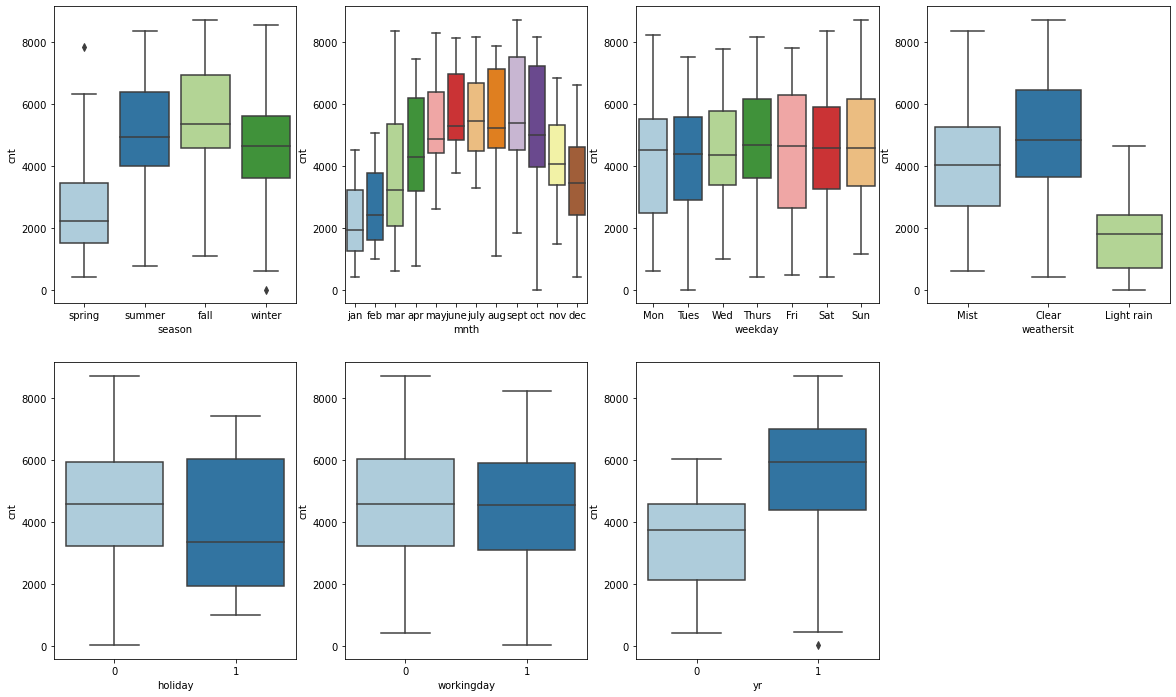

In [18]:
### visualizing categorical variables
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt' , data = boom_bikes, palette = 'Paired')
plt.show()

##### from the plots plotted above we can infere things based on each variable,
##### 1. in season 'fall' the total count of bike users or demand is increased followed by 'summer', 'winter' and 'spring'
##### 2. the demand for bikes is highest in the month of 'sept' and is good from month 'august' to 'october' while it is lower in the month 'january' and 'february'
##### 3. for 'clear' atmosphere, the demand for rented bikes is more and less in 'light_rain'
##### 4. for the next year, demand is increasing.

In [19]:
### visualizing 'cnt' vs 'columns' with hue= 'year', Creating function
def categorical_cols(col):
    plt.figure(figsize = (10,5))
    sns.barplot(col, 'cnt', data = boom_bikes, hue = 'yr', palette = 'hls')
    labels = ['2018', '2019']
    plt.legend(labels)
    plt.show()

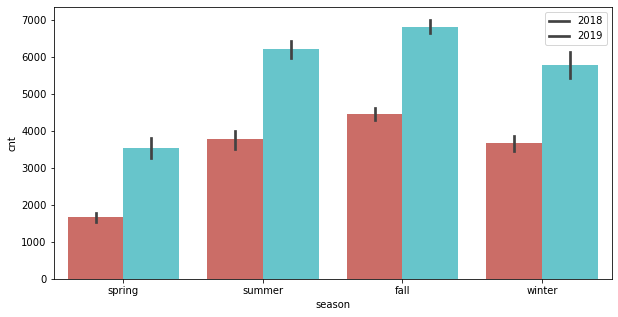

In [20]:
### 1. 'cnt' vs 'season'
categorical_cols('season')

##### above graph shows that demand for 'fall' season is more and the demand is increased in year 2019 for every season.

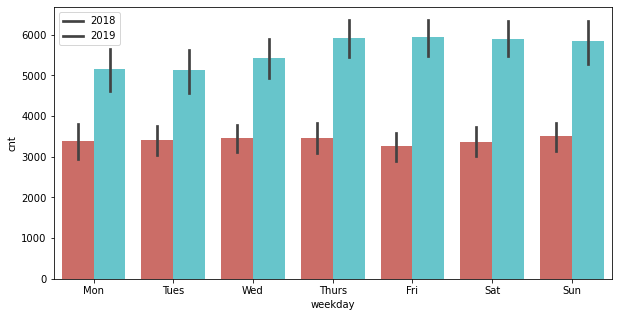

In [21]:
### 2. 'cnt' vs 'weekday'
categorical_cols('weekday')

##### after the mid of week, the demand is increasing till sunday as compared to others. Also for year 2019 count has increased.

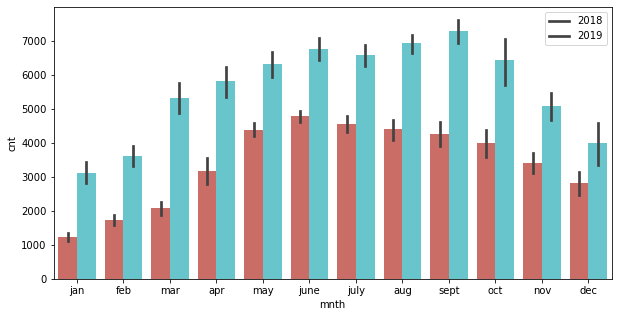

In [22]:
### 3. 'cnt' vs 'mnth'
categorical_cols('mnth')

##### the demand is more in month of sept and again in year 2019, demand is increased as compaired to 2018

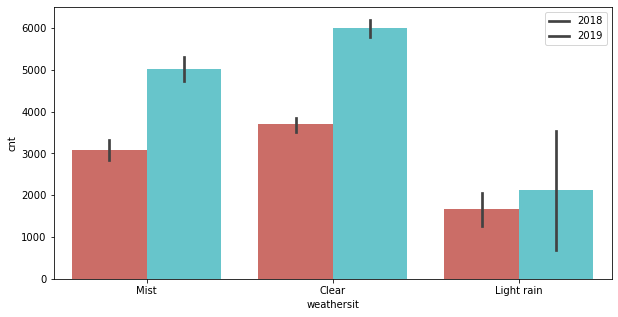

In [23]:
### 'cnt' vs 'weathersit'
categorical_cols('weathersit')

##### it is clear that the demand in decreased in light_rain weather which is obvious.

#### Finding the correlation betwwen variables(continuous)

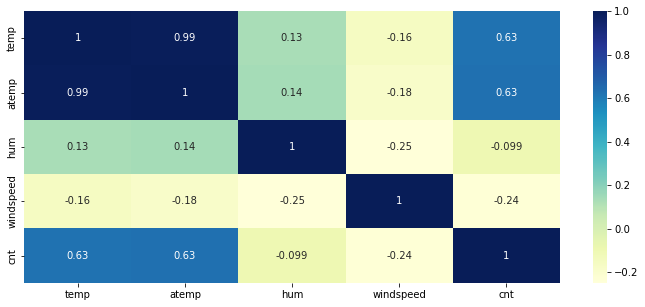

In [24]:
### ## heatmap to check the correlation between variables
plt.figure(figsize = (12,5))
sns.heatmap(boom_bikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

##### above heatmap shows that there is high collinearity 0.99 which is eqaul to 1 between 'temp' and 'atemp'. Hence one column needs to be dropped amongst two. The deciding factor will be p-value.

### Step 5: Data Preparation (Creating Dummy Variables)

In [25]:
### creating dummy variables for 'season','weekday','mnth','weathersit' and then merging with original datafram
## 1. 'mnth'
mnth_dummy = pd.get_dummies(boom_bikes['mnth'], drop_first = True)
## 2. 'weekday'
weekday_dummy = pd.get_dummies(boom_bikes['weekday'], drop_first = True)
## 3. 'weathersit'
weathersit_dummy = pd.get_dummies(boom_bikes['weathersit'], drop_first = True)
## 4. 'season'
season_dummy = pd.get_dummies(boom_bikes['season'], drop_first= True)

In [26]:
season_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spring  730 non-null    uint8
 1   summer  730 non-null    uint8
 2   winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 24.0 KB


In [27]:
mnth_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   aug     730 non-null    uint8
 1   dec     730 non-null    uint8
 2   feb     730 non-null    uint8
 3   jan     730 non-null    uint8
 4   july    730 non-null    uint8
 5   june    730 non-null    uint8
 6   mar     730 non-null    uint8
 7   may     730 non-null    uint8
 8   nov     730 non-null    uint8
 9   oct     730 non-null    uint8
 10  sept    730 non-null    uint8
dtypes: uint8(11)
memory usage: 29.7 KB


In [28]:
weekday_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Mon     730 non-null    uint8
 1   Sat     730 non-null    uint8
 2   Sun     730 non-null    uint8
 3   Thurs   730 non-null    uint8
 4   Tues    730 non-null    uint8
 5   Wed     730 non-null    uint8
dtypes: uint8(6)
memory usage: 26.1 KB


In [29]:
### merging these dataframes with boom_bikes
df_boom_bikes = pd.concat([boom_bikes,mnth_dummy, weekday_dummy, weathersit_dummy, season_dummy, ],axis = 1)
df_boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
0,spring,0,jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df_boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [31]:
### dropping 'season', 'mnth', 'weekday', 'weathersit' columns as  we have created dummies for them
df_boom_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df_boom_bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df_boom_bikes.shape

(730, 30)

### Step 6: Model Building

#### 6.1 Splitting Dataset into Train and Test Sets

In [33]:
np.random.seed(0)
train_df, test_df = train_test_split(df_boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
train_df.shape

(510, 30)

#### 6.2 Rescaling the Features

In [35]:
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except 'dummy' variables
vars_num = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
train_df[vars_num] = scaler.fit_transform(train_df[vars_num])
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [37]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


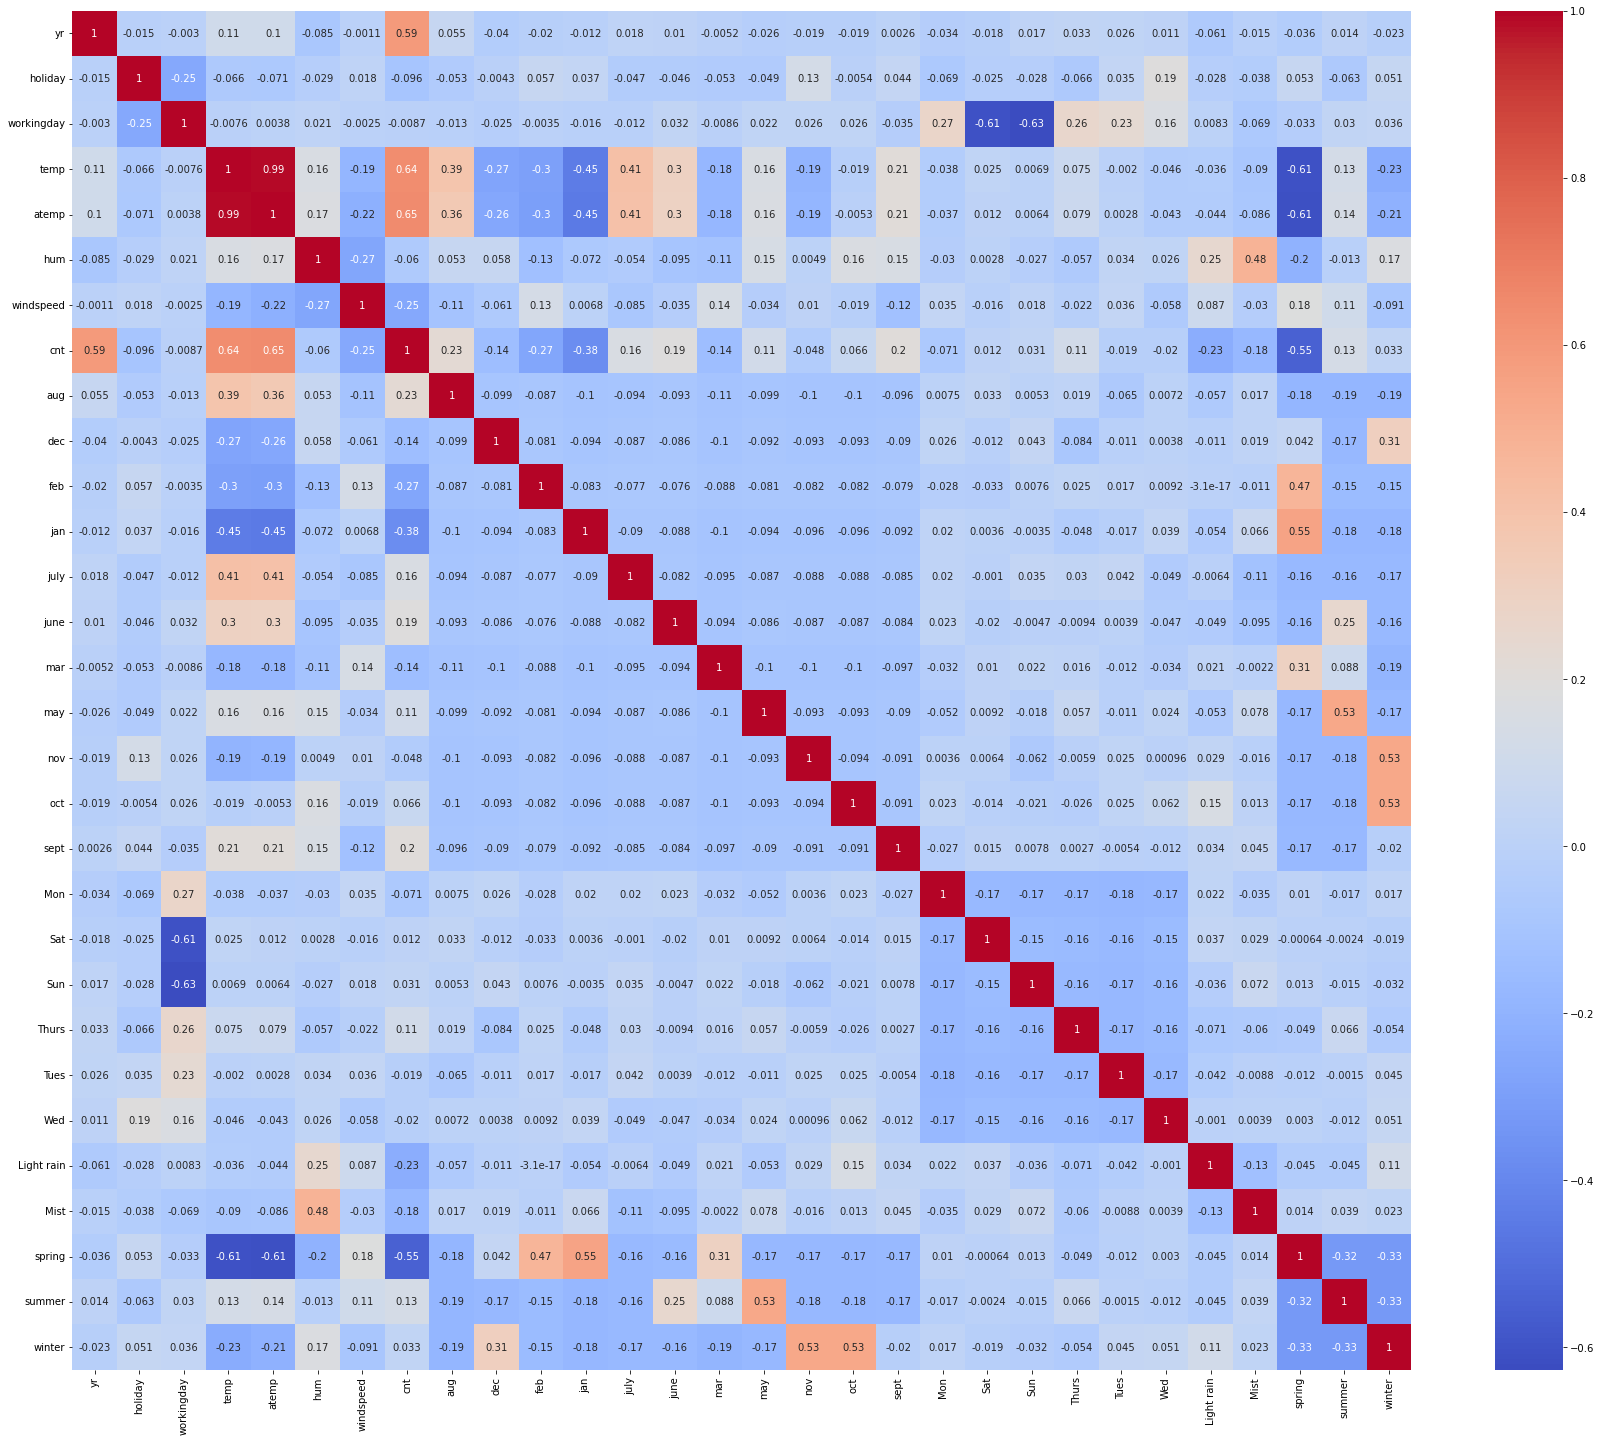

In [38]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,25))
#colormap = sns.color_palette("Greens")
#mat = np.tril(train_df.corr())
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

##### we can see that 'cnt' has good relationship with 'temp' and 'yr'. Also variables fall and temp have good relationship between them. Spring season with jan and feb having good relationship.

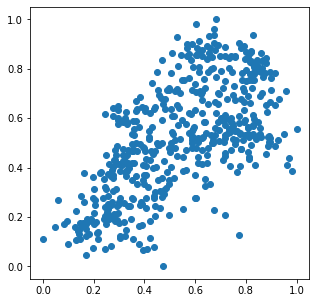

In [39]:
### visualizing relationship between 'cnt' and 'temp'
plt.figure(figsize=[5,5])
plt.scatter(train_df.temp, train_df.cnt)
plt.show()

##### hence it is validated that cnt and temp have positive relationship between them

#### 6.3 Creating X and y

In [40]:
y_train = train_df.pop('cnt')
X_train = train_df

#### 6.4 Recursive Feature Elimination

In [41]:
## importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thurs', False, 13),
 ('Tues', False, 8),
 ('Wed', False, 11),
 ('Light rain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [44]:
## checking the columns selected by rfe (one's with True in above list)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sept', 'Light rain', 'Mist', 'spring', 'summer', 'winter'],
      dtype='object')

In [45]:
## checking the columns rejected by rfe
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'Mon',
       'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

#### 6.5 Building model using statsmodel, for the detailed statistics

##### 6.5.1 Model 1

In [46]:
X_trainRFE = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr1 = sm.add_constant(X_trainRFE)

lr_1 = sm.OLS(y_train,X_train_lr1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.34e-189
Time:                        07:24:23   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [48]:
### Creating function to calculate VIF for models
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_calculation(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [49]:
VIF_calculation(X_trainRFE)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Mist,2.32
0,yr,2.09
8,nov,1.83
6,jan,1.75


##### the variable 'hum' is showing high value for VIF, hence we can drop it.

In [50]:
## dropping 'hum' variable
X_train_rfe = X_trainRFE.drop(['hum'], axis = 1)

#### Rebuilding the model without 'hum'

##### 6.5.2 Model 2

In [51]:
import statsmodels.api as sm  
X_train_lr2 = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train,X_train_lr2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.57e-186
Time:                        07:24:23   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [52]:
VIF_calculation(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,nov,1.80
5,jan,1.66
6,july,1.59
10,Mist,1.56


In [53]:
### dropping 'nov' variable as it has high p-value
X_train_rfe = X_train_rfe.drop(['nov'], axis = 1)

##### 6.5.3 Model 3

In [54]:
import statsmodels.api as sm  
X_train_lr3 = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train,X_train_lr3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.20e-186
Time:                        07:24:23   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2288      0.031      7.334      0.0

In [55]:
VIF_calculation(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.23
0,yr,2.07
12,winter,2.06
5,jan,1.65
6,july,1.59
9,Mist,1.56
7,sept,1.34


###### VIF doesn't seem to be changed too much. So will go for p-value again.
###### and p-value for 'dec' is high. so we will drop the column 'dec'

In [56]:
X_train_rfe = X_train_rfe.drop(['dec'], axis = 1)

##### 6.5.4 Model 4

In [57]:
import statsmodels.api as sm  
X_train_lr4 = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train,X_train_lr4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.97e-187
Time:                        07:24:24   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

In [58]:
VIF_calculation(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,spring,2.75
10,summer,2.22
0,yr,2.07
11,winter,1.79
4,jan,1.61
5,july,1.59
8,Mist,1.56
6,sept,1.34


##### again no major changes in VIF values, hence checking for p-values.
##### p-value for month 'jan' is high as compared to others, hence dropping 'jan' column.

In [59]:
X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)

##### 6.5.5 Model 5

In [60]:
import statsmodels.api as sm  
X_train_lr5 = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train,X_train_lr5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.40e-187
Time:                        07:24:24   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

##### R-squared value and adj R-squared values are preety good. Also p-values are also good except for 'july' month as it is exactly 0.005 which we can accept. But lets see first the values of VIF. if they are changed then this model can be acceptable and if not, we can drop 'july' and observe changes.

In [61]:
VIF_calculation(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.21
8,spring,2.08
0,yr,2.07
10,winter,1.79
4,july,1.58
7,Mist,1.55
5,sept,1.34
6,Light rain,1.08


##### VIF values are dropped but not significantly. Henec lets try dropping 'july' column.

In [62]:
X_train_rfe = X_train_rfe.drop(['july'], axis = 1)

##### 6.5.6 Model 6

In [63]:
import statsmodels.api as sm  
X_train_lr6 = sm.add_constant(X_train_rfe)

lr_6 = sm.OLS(y_train,X_train_lr6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.36e-187
Time:                        07:24:24   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

#### p-values are good and acceptable, lets have check for VIF

In [64]:
VIF_calculation(X_train_rfe)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Mist,1.54
4,sept,1.23
5,Light rain,1.08
1,holiday,1.04


#### From the results of model above, VIF for all features is below 5 which is good and acceptable. Also, the p-value is less than 0.005 with very good values of R squared , adjusted R-squared and F-stastics. Hence, overall model 6 looks good and acceptable. But lets give a try by adding 'Sun' if it affects or not.

In [65]:
### adding 'Sun' to check if model improves or not
X_train_rfe['Sun'] = X_train['Sun']
X_train_rfe.head()

,yr,holiday,temp,windspeed,sept,Light rain,Mist,spring,summer,winter,Sun
653,1,0,0.509887,0.300794,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,1,1,0,0,1
728,1,0,0.245101,0.663106,0,0,0,1,0,0,0
482,1,0,0.395666,0.188475,0,0,1,0,1,0,1


##### 6.5.7 Model 7

In [66]:
import statsmodels.api as sm  
X_train_lr7 = sm.add_constant(X_train_rfe)

lr_7 = sm.OLS(y_train,X_train_lr7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.52e-186
Time:                        07:24:24   Log-Likelihood:                 496.76
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     498   BIC:                            -918.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1878      0.030      6.350      0.0

In [67]:
VIF_calculation(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.88
0,yr,2.07
7,spring,2.00
8,summer,1.89
9,winter,1.63
6,Mist,1.55
4,sept,1.23
10,Sun,1.17
5,Light rain,1.08


##### Adding 'Sun' to the data didn't affect the VIF values but it affected the p-value for itself, hence dropping 'Sun' will be good decision.

In [68]:
X_train_rfe = X_train_rfe.drop(['Sun'], axis = 1)

##### Lets check the feasibilty of 'workingday' in the model by adding it

In [69]:
X_train_rfe['workingday'] = X_train['workingday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,sept,Light rain,Mist,spring,summer,winter,workingday
653,1,0,0.509887,0.300794,0,0,0,0,0,1,1
576,1,0,0.815169,0.264686,0,0,0,0,0,0,1
426,1,0,0.442393,0.255342,0,0,1,1,0,0,0
728,1,0,0.245101,0.663106,0,0,0,1,0,0,1
482,1,0,0.395666,0.188475,0,0,1,0,1,0,0


##### 6.5.9 Model 8

In [70]:
import statsmodels.api as sm  
X_train_lr8 = sm.add_constant(X_train_rfe)

lr_8 = sm.OLS(y_train,X_train_lr8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          8.05e-187
Time:                        07:24:24   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2079      0.030      6.854      0.0

In [71]:
VIF_calculation(X_train_rfe)

,Features,VIF
2,temp,4.74
3,windspeed,4.61
10,workingday,3.54
7,spring,2.23
0,yr,2.07
8,summer,1.98
9,winter,1.83
6,Mist,1.55
4,sept,1.23
1,holiday,1.11


##### by adding 'workingday', the VIF values are increased slightly. Also, the p-value of 'workingday' is high, hence, 'workingday' should be dropped.

In [72]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

#### Let's check for month 'feb'

In [73]:
X_train_rfe['feb'] = X_train['feb']
X_train_rfe.head()

,yr,holiday,temp,windspeed,sept,Light rain,Mist,spring,summer,winter,feb
653,1,0,0.509887,0.300794,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,1,1,0,0,0
728,1,0,0.245101,0.663106,0,0,0,1,0,0,0
482,1,0,0.395666,0.188475,0,0,1,0,1,0,0


##### 6.5.11 Model 9

In [74]:
import statsmodels.api as sm  
X_train_lr9 = sm.add_constant(X_train_rfe)

lr_9 = sm.OLS(y_train,X_train_lr9).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.16e-185
Time:                        07:24:24   Log-Likelihood:                 495.19
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     498   BIC:                            -915.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.449      0.0

In [75]:
VIF_calculation(X_train_rfe)

,Features,VIF
3,windspeed,4.61
2,temp,3.84
7,spring,2.32
0,yr,2.07
8,summer,1.89
9,winter,1.64
6,Mist,1.54
10,feb,1.39
4,sept,1.23
5,Light rain,1.08


#### 'feb' has very high p-value, hence need to drop it

In [76]:
X_train_rfe = X_train_rfe.drop(['feb'], axis = 1)

#### Here we checked 3-4 variables which were not selected by RFE and checked for better model. But model 6 is the model we can consider as it has lower multicollinearity between features. Also the p-value for all features is significant.
#### The F-statistic value is greater than 1 and p(F- statistic) is almost equal to zero.
#### Hence Overall Model 6 is good. Let's check for Residual Analysis.

In [77]:
### checking for parameters of model 6
lr_6.params

const         0.190994
yr            0.234060
holiday      -0.096865
temp          0.478177
windspeed    -0.148155
sept          0.090932
Light rain   -0.286002
Mist         -0.080124
spring       -0.055092
summer        0.060987
winter        0.095929
dtype: float64

### Step 7 Residual Analysis of Train data

In [78]:
X_train_lr6

,const,yr,holiday,temp,windspeed,sept,Light rain,Mist,spring,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,1,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1


In [79]:
y_train_cnt = lr_6.predict(X_train_lr6)

##### Error terms normality

Text(0.5, 0, 'Errors')

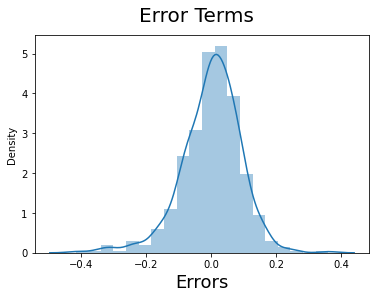

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

##### Error terms are following Normal distribution and mean is zero or near to zero

##### Checking for Multicollinearity

In [81]:
VIF_calculation(X_train_rfe)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Mist,1.54
4,sept,1.23
5,Light rain,1.08
1,holiday,1.04


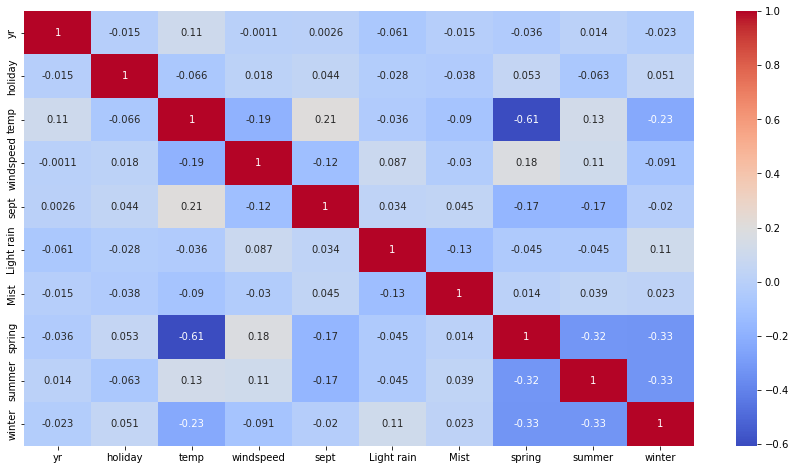

In [82]:
### plotting heatmap for better visualization
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="coolwarm")
plt.show()

##### from above graph and VIF values it is clear that, there is no multicollinearity between predictiors.

##### Checking for Linear Reltionship between Target and Feature variables

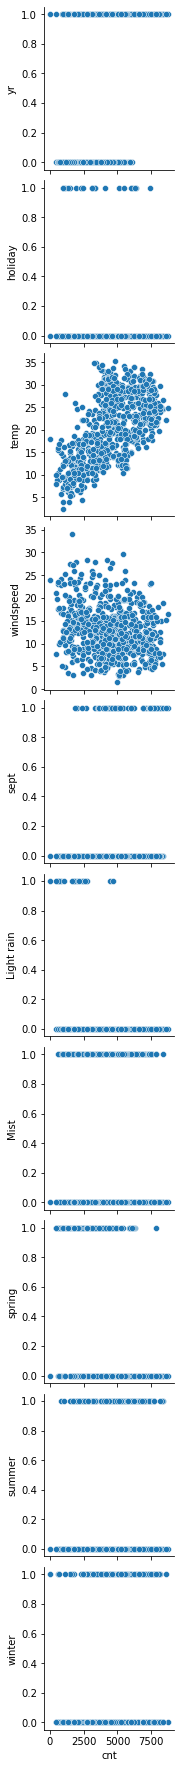

<Figure size 1440x1080 with 0 Axes>

In [83]:
# Pair Plot for numerical variables

sns.pairplot(df_boom_bikes, y_vars=X_train_rfe.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

#### we can see the linear relatioship between 'cnt' and predictor variables.

#### Homoscedasticity

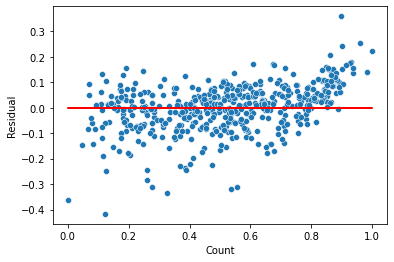

In [84]:
y_train_cnt= lr_6.predict(X_train_lr6)
res = y_train - y_train_cnt
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Durbin-Watson value of final model lr_6 is 2.076, which signifies there is no autocorrelation, which is good for case

#### Hence All assumptions for model and error terms are checked.

### Step 8. Making Predictions

##### Applying scaling on test set

In [85]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [86]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,Sat,Sun,Thurs,Tues,Wed,Light rain,Mist,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
## dividing into X_test and y_test
y_test = test_df.pop('cnt')
X_test = test_df

In [88]:
col_test = X_train_rfe.columns

X_test = X_test[col_test]
X_test_lr_6 = sm.add_constant(X_test)

In [89]:
y_test_cnt = lr_6.predict(X_test_lr_6)

In [90]:
r2 = r2_score(y_test, y_test_cnt)
round(r2,4)

0.8035

In [91]:
# Calculating Adj-R-squared value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7941


### Step 9. Model Evaluation

Text(0, 0.5, 'y_test_cnt')

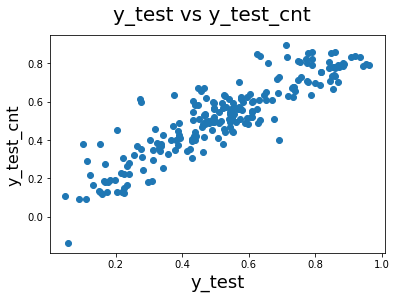

In [92]:
# Plotting y_test and y_test_cnt to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_cnt)
fig.suptitle('y_test vs y_test_cnt', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_cnt', fontsize = 16)

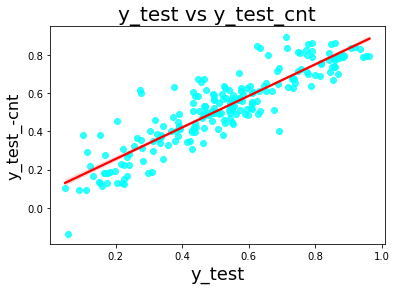

In [93]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_cnt, ci=68, fit_reg=True,scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_cnt', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_-cnt', fontsize=16)
plt.show()

In [94]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,sept,Light rain,Mist,spring,summer,winter
653,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,1,0,1,0


In [95]:
print(round(lr_6.params,4))

const         0.1910
yr            0.2341
holiday      -0.0969
temp          0.4782
windspeed    -0.1482
sept          0.0909
Light rain   -0.2860
Mist         -0.0801
spring       -0.0551
summer        0.0610
winter        0.0959
dtype: float64


### __Hence the equation for best fil line is__



### __cnt = 0.1910 + (0.2341)* yr - (0.0969)* holiday + (0.4782)* temp - (0.1482)* windspeed + (0.0909)* sept - (0.2860)* Light rain - (0.0801)* Miist - (0.0551)* spring + (0.0610)* summer + (0.0959)* winter__

### R-sqaured values for Train and Test dataset

#### - Train dataset R^2          : 0.833                      
#### - Test dataset R^2           : 0.8035

#### - Train dataset Adjusted R^2 : 0.830                     
#### - Test dataset Adjusted R^2  : 0.7941

#### __R-sqaured of 83.3% on train data and 83% on test data.__

### Inference

### __Demand of bikes depend on year, holiday, temp, windspeed, sep, Light Rain, Mist, spring, summer and winter.__